# Titanic - Machine Learning from Disaster

## Introduction

In this notebook you will find a simple approach to predict whether the other 418 passengers on board survived or not. For this machine learning model dataset from Kaggle Titanic ML competition has been used.


## Table of contents:

**Loading data** 

**Print and Data visualization**
* Number of attributes, number of records
* Find missing data
* Plotting taining and testing data

**Data Processing**

* Data cleaning: Dealing with null values, delete columns that are useless

   
**Look for the correlation**


**Classification Model**

* RandomForestClassifier
* DecisionTreeClassifier 
* LogisticRegression
* KNeighborsClassifier
* SVC

  
**Preprocessing test data**

**Cross Validation**

**Calculate the Accuracy of the models**

**Fine tune model**
* grid searching key hyperparametres for RandomForestClassifier

**Results**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data 



In [2]:
train = pd.read_csv("C:/Users/janna/pytorchTutorialPractice/cse445/titanic/train.csv")# traning dataset
test = pd.read_csv("C:/Users/janna/pytorchTutorialPractice/cse445/titanic/test.csv")# testing dataset

# Print and Data visualization

In [3]:
#data exploration
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### The attributes have the following meaning:

**Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.

**Pclass**: passenger class.

**Name, Sex, Age**: self-explanatory

**SibSp**: how many siblings & spouses of the passenger aboard the Titanic.

**Parch**: how many children & parents of the passenger aboard the Titanic.

**Ticket**: ticket id

**Fare**: price paid (in pounds)

**Cabin**: passenger's cabin number

**Embarked**: where the passenger embarked the Titanic

In [5]:
#data exploration
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Number of attributes, number of records 

In [7]:
number_of_rows_train = train.shape[0]

number_of_attribute_train = train.shape[1]
print("number of records and attributes in train data : ", number_of_rows_train," & ",number_of_attribute_train)

number_of_rows_test = test.shape[0]

number_of_attribute_test = test.shape[1]

print("number of records and attributes in test data : ", number_of_rows_test," & ",number_of_attribute_test)

number of records and attributes in train data :  891  &  12
number of records and attributes in test data :  418  &  11


### Find missing data 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


***Training set have missing values in Age, Cabin and Embarked columns***

***Test set have missing values in Age, Cabin and Fare columns***

### Plotting taining and testing data

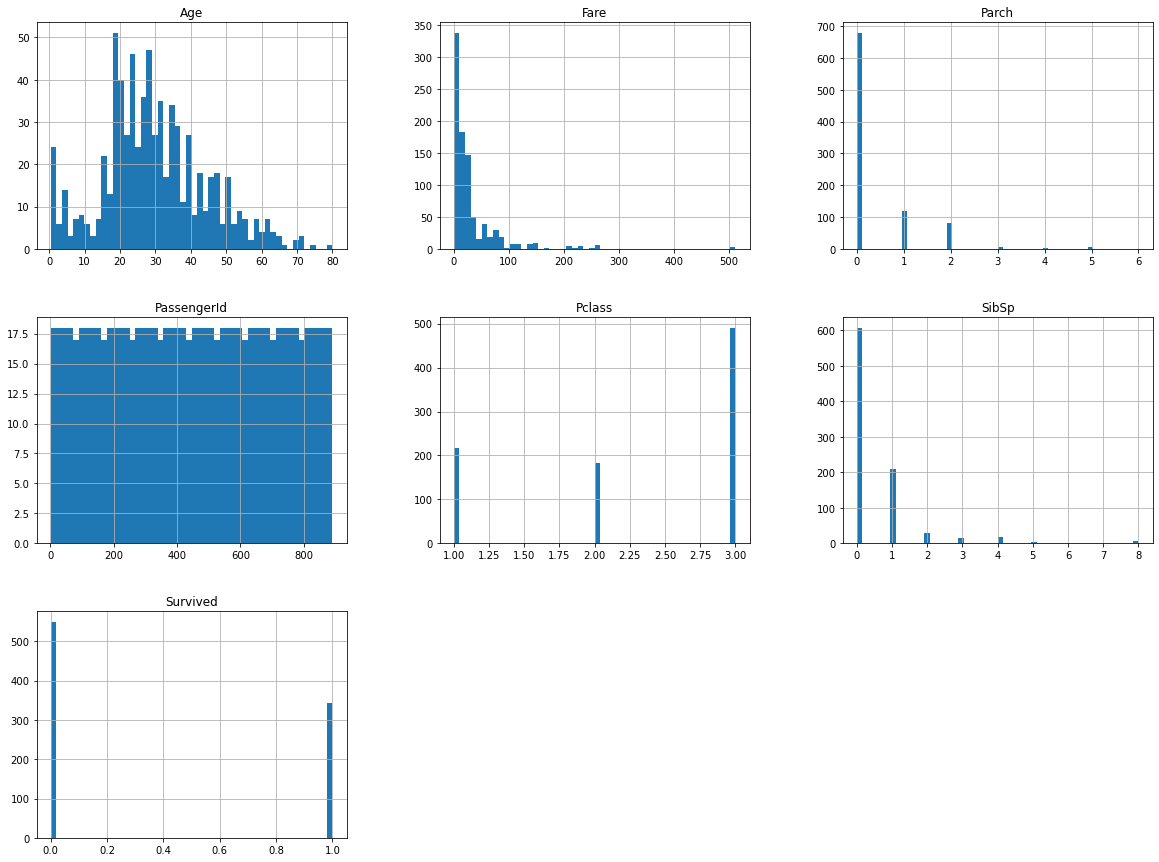

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

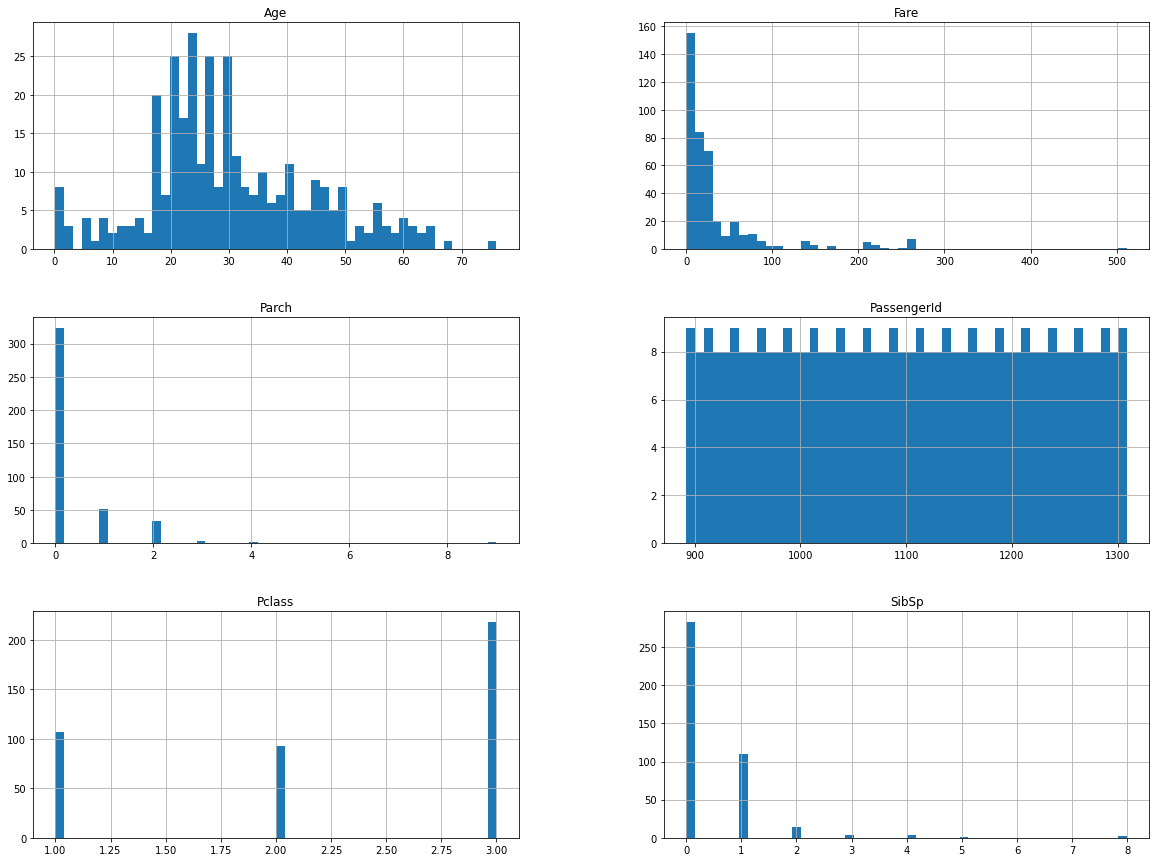

In [11]:
test.hist(bins=50, figsize=(20,15))
plt.show()

# Data Processing

### Remove Nulls values
 • age

In [12]:
train.Age = train.Age.fillna(train.Age.mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Delete columns that are useless
Columns that are not useful in the analysis : Name, Ticket,Cabin 

"This 3 columns we are not going to use because there are unique for each row"

In [13]:
del train["Name"]
del train["Ticket"]
del train["Cabin"]

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Create the dummys variables


In [15]:
train_dummy = pd.get_dummies(train,columns=["Sex"])

In [16]:
train_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


In [17]:
del train_dummy["Sex_male"]

# Look for the correlation between the columns and the price


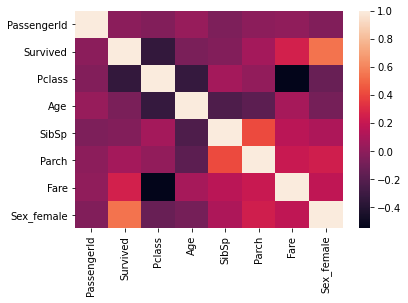

In [18]:
sns.heatmap(train_dummy.corr())

### Plotting relationship in survived and columns¶


Text(0.5, 0, 'Sex')

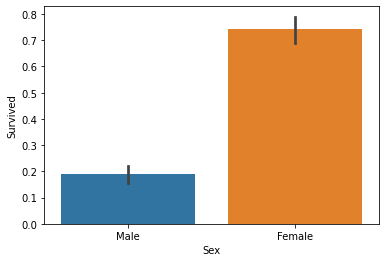

In [19]:
geneder_graph = sns.barplot(x = "Sex_female", y = "Survived", data = train_dummy)
geneder_graph.set(xticklabels=["Male", "Female"])
plt.xlabel("Sex")

***We saw that the female are the group with the highest chance of surviving***



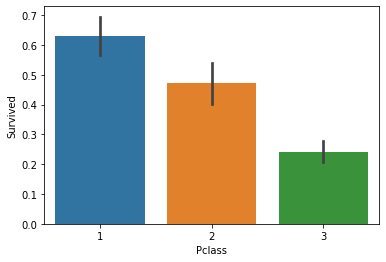

In [20]:
g_graph = sns.barplot(x = "Pclass", y = "Survived", data = train_dummy)


***In this graph we saw that the people that were in first class had most posibility of surviving***

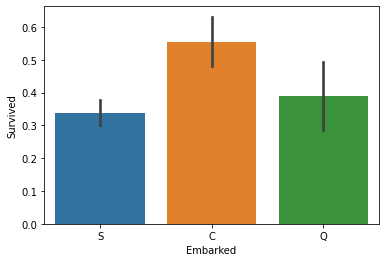

In [21]:
sns.barplot(x = "Embarked", y = "Survived", data = train_dummy)


### For the variables that have numerical x label we are going to group
• Age

• Fare

In [22]:
df = train_dummy[["Age","Survived"]]
df["Age_group"] = 0
df = df.dropna()
df.describe()

<ipython-input-22-73ab2f4e04db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_group"] = 0


,Age,Survived,Age_group
count,891.000000,891.000000,891.0
mean,29.699118,0.383838,0.0
std,13.002015,0.486592,0.0
min,0.420000,0.000000,0.0
25%,22.000000,0.000000,0.0
50%,29.699118,0.000000,0.0
75%,35.000000,1.000000,0.0
max,80.000000,1.000000,0.0


In [23]:
df.loc[df["Age"] <= 10 , "Age_group"] = 10
df.loc[(df["Age"] > 10) & (df["Age"] <= 20), "Age_group"] = 20
df.loc[(df["Age"] > 20) & (df["Age"] <= 30), "Age_group"] = 30
df.loc[(df["Age"] > 30) & (df["Age"] <= 40), "Age_group"] = 40
df.loc[(df["Age"] > 40) & (df["Age"] <= 50), "Age_group"] = 50
df.loc[(df["Age"] > 50) & (df["Age"] <= 60), "Age_group"] = 60
df.loc[(df["Age"] > 60) & (df["Age"] <= 70), "Age_group"] = 70
df.loc[(df["Age"] > 70), "Age_group"] = 80

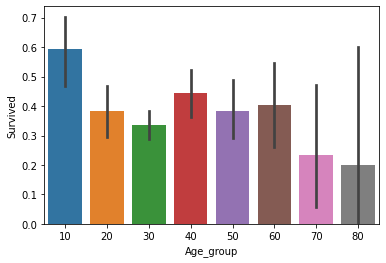

In [24]:
 sns.barplot(x = "Age_group", y = "Survived", data = df)

***The group that has more posibility to survived are the childs***



### Divide the labels and the columns


In [25]:
train_dummy = pd.get_dummies(train,columns=["Embarked","Sex"])
del train_dummy["Sex_male"]
del train_dummy["Embarked_S"]

In [26]:
y_train = train_dummy["Survived"]

In [27]:
del train_dummy["Survived"]
X_train = train_dummy

In [28]:
X_test = test

# Classification Model


### Evaluating models and making a choice
In this section we evaluate the performance of the following models on the data and chose those who have a good accuracy.

* **RandomForestClassifier** 
* **DecisionTreeClassifier** 
* **LogisticRegression** 
* **KNeighborsClassifier** 
* **SVC** 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
clf = tree.DecisionTreeClassifier()

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
rf = RandomForestClassifier()

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
KN = KNeighborsClassifier()

In [35]:
KN.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
supportVectorMAchine = SVC()

In [37]:
supportVectorMAchine.fit(X_train, y_train)

SVC()

# Preprocesing test data

* Dummy
* Nulls
* Del columns


In [38]:
X_test = pd.get_dummies(X_test,columns=["Embarked","Sex"])
del X_test["Sex_male"]
del X_test["Embarked_S"]

In [39]:
X_test.Age = X_test.Age.fillna(X_test.Age.mean())
X_test.Fare = X_test.Fare.fillna(X_test.Fare.mean())

In [40]:
del X_test["Name"]
del X_test["Ticket"]
del X_test["Cabin"]

# Calculate the Accuracy of the model


In [41]:
Y_pred_test_tree = clf.predict(X_test)
Y_pred_test_Randomforest = rf.predict(X_test)
Y_pred_test_KN = KN.predict(X_test)
Y_pred_test_SVC = supportVectorMAchine.predict(X_test)

In [42]:
Y_pred_test_SVC.shape


(418,)

In [43]:
submission = pd.read_csv("C:/Users/janna/pytorchTutorialPractice/cse445/titanic/gender_submission.csv")


In [44]:
X_test.shape

(418, 9)

In [45]:
Accuracy_tree = np.mean(submission["Survived"] == Y_pred_test_tree)
print(Accuracy_tree)

0.6746411483253588


In [46]:
Accuracy_randomforest = np.mean(submission["Survived"] == Y_pred_test_Randomforest)
print(Accuracy_randomforest)

0.7918660287081339


In [47]:
Accuracy_KNeighborsClassifier = np.mean(submission["Survived"] == Y_pred_test_KN)
print(Accuracy_KNeighborsClassifier)

0.6483253588516746


In [48]:
Accuracy_SVC = np.mean(submission["Survived"] == Y_pred_test_SVC)
print(Accuracy_SVC)

0.6483253588516746


# Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.78651685 0.75280899 0.83146067 0.8988764  0.83146067
 0.83146067 0.76404494 0.85393258 0.82022472]
Mean: 0.8126342072409489
Standard Deviation: 0.044882354973750344


In [50]:
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.68888889 0.76404494 0.73033708 0.6741573  0.66292135 0.78651685
 0.80898876 0.75280899 0.7752809  0.80898876]
Mean: 0.7452933832709114
Standard Deviation: 0.05135327261158607


In [51]:
from sklearn.model_selection import cross_val_score
KN = KNeighborsClassifier()
scores = cross_val_score(KN, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.44444444 0.61797753 0.42696629 0.4494382  0.4494382  0.48314607
 0.46067416 0.47191011 0.53932584 0.65168539]
Mean: 0.4995006242197254
Standard Deviation: 0.07390814269137466


In [52]:
from sklearn.model_selection import cross_val_score
supportVectorMAchine = SVC()
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.80898876 0.74157303 0.82022472 0.93258427 0.84269663
 0.85393258 0.78651685 0.84269663 0.83146067]
Mean: 0.8260674157303372
Standard Deviation: 0.047342720295779545


### printing the prediction result of each Decisiontree,Randomforest,K-NeighborsClassifier,LogisticRegression,SVC


In [53]:
print(f'With decisionTree model we can predict with the {round(Accuracy_tree*100,2)}% who survived in the titanic')
print(f'With Randomforest model we can predict with the {round(Accuracy_randomforest*100,2)}% who survived in the titanic')
print(f'With KNeighborsClassifier model we can predict with the {round(Accuracy_KNeighborsClassifier*100,2)}% who survived in the titanic')
print(f'With Support Vector machine model we can predict with the {round(Accuracy_SVC*100,2)}% who survived in the titanic')

With decisionTree model we can predict with the 67.46% who survived in the titanic
With Randomforest model we can predict with the 79.19% who survived in the titanic
With KNeighborsClassifier model we can predict with the 64.83% who survived in the titanic
With Support Vector machine model we can predict with the 64.83% who survived in the titanic


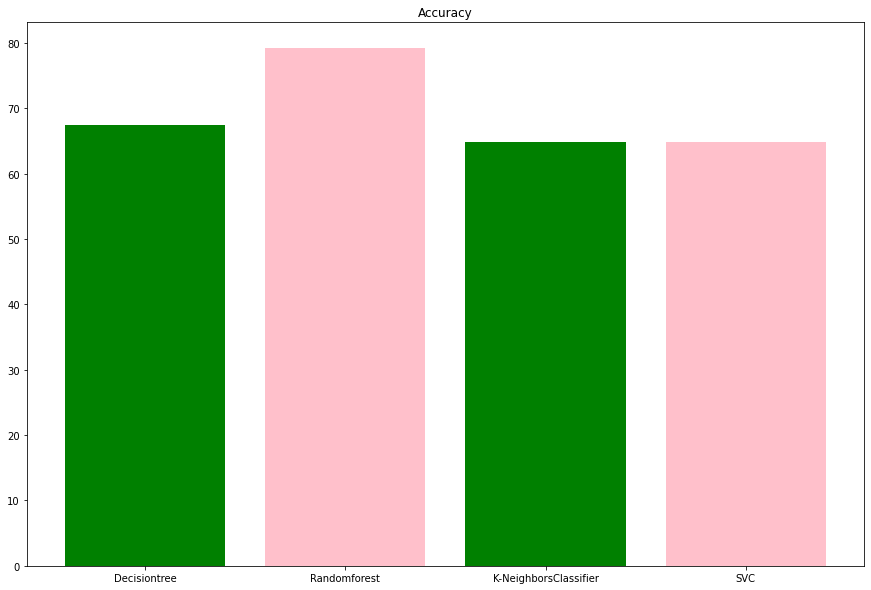

In [54]:
#plotting the accuracy of Decisiontree,Randomforest,K-NeighborsClassifier,LogisticRegression,SVC
import matplotlib.pyplot as plt
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
#ax = fig.add_axes([0,0,1,1])
acuracy = ['Decisiontree', 'Randomforest', 'K-NeighborsClassifier','SVC']
model = [Accuracy_tree*100, Accuracy_randomforest*100, Accuracy_KNeighborsClassifier*100 , Accuracy_SVC*100]
ax.bar(acuracy,model, color = ['green', 'pink'])
plt.title('Accuracy')
plt.show()

 ***• heighest accuracy 79.19%  for Randomforest***

# Fine Tune Model

In [55]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


###  grid searching key hyperparameters for RandomForestClassifier


In [56]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_randomforest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search_randomforest.fit(X_train, y_train)

# summarize results
tuned_RandomForestClassifier_accuracy = grid_result.best_score_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 0.825277 using {'max_features': 'sqrt', 'n_estimators': 100}


### illustrating the accuracy before and after tuning using Grid search for RandomForestClassifier

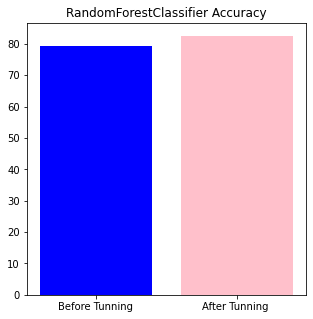

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

acuracy = ['Before Tunning', 'After Tunning ']
model = [Accuracy_randomforest*100, tuned_RandomForestClassifier_accuracy*100]
ax.bar(acuracy,model, color = ['blue', 'pink'])
plt.title('RandomForestClassifier Accuracy')
plt.show()

***Fine tuning has improved the accuracy***

# Result

In [58]:
print("result after tuning:")
print(f'With Randomforest model we can predict with the {round(tuned_RandomForestClassifier_accuracy*100,2)}% who survived in the titanic')


result after tuning:
With Randomforest model we can predict with the 82.53% who survived in the titanic


 ***• heighest accuracy 82.53% after tuning using Grid Seacrh for Randomforest***

In [59]:
survived1 = pd.DataFrame(data = X_test["PassengerId"]).rename(columns={0:'PassengerId'})
pred = grid_search_randomforest.best_estimator_.predict(X_test)
survived1["Survived"] = pred
survived1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### save prediction result into csv

In [60]:

survived1.to_csv('Titanic_result.csv',index=False)
